In [1]:
using DrWatson

In [2]:
@quickactivate
projectname()

"NowcastingHuascaran"

In [3]:
using PyCall
using Serialization
using ClimateBase
using Plots
using HDF5

In [4]:
const tf = pyimport("tensorflow")
const keras = pyimport("tensorflow.keras")

PyObject <module 'tensorflow.keras' from 'C:\\Users\\coolh\\miniconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\__init__.py'>

In [13]:
repeat_elements = keras.backend.repeat_elements
expand_dims = keras.backend.expand_dims

PyObject <function expand_dims at 0x00000000B9C80670>

In [6]:
archs = readdir("../artifacts/experiments/"; join=true)

7-element Vector{String}:
 "../artifacts/experiments/1"
 "../artifacts/experiments/Input6" ⋯ 21 bytes ⋯ "2_3x3x48_Drop0.2_1x1x48_3x3x3x1"
 "../artifacts/experiments/Input6" ⋯ 36 bytes ⋯ "2_3x3x64_Drop0.2_1x1x64_3x3x3x1"
 "../artifacts/experiments/Input6" ⋯ 57 bytes ⋯ "_ConvLSTM2D1x1x64_Conv3D3x3x3x1"
 "../artifacts/experiments/Input64x64x8_5x5x64_3x3x64_1x1x16"
 "../artifacts/experiments/InputL" ⋯ 79 bytes ⋯ "TM2D8x64x64x64_Conv2D8x64x64x64"
 "../artifacts/experiments/failed"

In [7]:
ds_path = datadir("exp_pro", "GLM-L2-LCFA_8km_5m_boxes", "2019", "jls")
ds = deserialize(readdir(ds_path; join=true)[1])

19-element Vector{<:ClimArray}:
 ClimArray (named flash_extent_density) with 64×64×288 Lon×Lat×Time data
 ClimArray (named flash_extent_density) with 64×64×32 Lon×Lat×Time data
 ClimArray (named flash_extent_density) with 64×64×25 Lon×Lat×Time data
 ClimArray (named flash_extent_density) with 64×64×47 Lon×Lat×Time data
 ClimArray (named flash_extent_density) with 64×64×135 Lon×Lat×Time data
 ClimArray (named flash_extent_density) with 64×64×132 Lon×Lat×Time data
 ClimArray (named flash_extent_density) with 64×64×103 Lon×Lat×Time data
 ClimArray (named flash_extent_density) with 64×64×76 Lon×Lat×Time data
 ClimArray (named flash_extent_density) with 64×64×117 Lon×Lat×Time data
 ClimArray (named flash_extent_density) with 64×64×97 Lon×Lat×Time data
 ClimArray (named flash_extent_density) with 64×64×30 Lon×Lat×Time data
 ClimArray (named flash_extent_density) with 64×64×27 Lon×Lat×Time data
 ClimArray (named flash_extent_density) with 64×64×110 Lon×Lat×Time data
 ClimArray (named flash_ex

animation (generic function with 1 method)

In [36]:
x = Float32.(rand(Float32, 5, 5, 5) .> .3)

5×5×5 Array{Float32, 3}:
[:, :, 1] =
 1.0  1.0  0.0  1.0  1.0
 1.0  0.0  1.0  0.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  0.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  0.0

[:, :, 2] =
 0.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  0.0
 1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  1.0  0.0
 0.0  1.0  0.0  1.0  1.0

[:, :, 3] =
 1.0  1.0  1.0  1.0  0.0
 1.0  1.0  0.0  1.0  0.0
 0.0  1.0  0.0  1.0  1.0
 1.0  0.0  0.0  1.0  1.0
 0.0  1.0  1.0  1.0  0.0

[:, :, 4] =
 1.0  0.0  1.0  1.0  1.0
 1.0  0.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 0.0  1.0  0.0  0.0  1.0
 1.0  1.0  0.0  1.0  1.0

[:, :, 5] =
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  0.0  1.0  1.0
 1.0  1.0  0.0  1.0  0.0
 0.0  1.0  1.0  1.0  0.0
 1.0  1.0  1.0  0.0  1.0

In [38]:
x .== x .== 1

5×5×5 BitArray{3}:
[:, :, 1] =
 1  1  0  1  1
 1  0  1  0  1
 1  1  1  1  1
 1  0  1  1  1
 0  1  1  1  0

[:, :, 2] =
 0  1  1  1  1
 1  1  1  1  0
 1  1  1  1  1
 0  0  0  1  0
 0  1  0  1  1

[:, :, 3] =
 1  1  1  1  0
 1  1  0  1  0
 0  1  0  1  1
 1  0  0  1  1
 0  1  1  1  0

[:, :, 4] =
 1  0  1  1  1
 1  0  1  1  1
 1  1  1  1  1
 0  1  0  0  1
 1  1  0  1  1

[:, :, 5] =
 1  1  1  1  1
 1  1  0  1  1
 1  1  0  1  0
 0  1  1  1  0
 1  1  1  0  1

In [102]:
function animation_comparation(preds, grounds, fps)
    n = size(preds, 3)
    anim = @time @animate for i = 1:n
        pred = preds[:,:,i]
        ground = grounds[:,:,i]
        intersect_t = ground .≈ pred .≈ 1.0
        zerotonan(x) = x == 0 ? NaN : x
        
        h1 = heatmap(ground, c=cgrad([:black, :red]), legend=false, clim=(0,1))
        heatmap!(zerotonan.(pred), c=cgrad([:black, :white]), legend=false, clim=(0,1))
        heatmap!(zerotonan.(intersect_t), c=cgrad([:black, :blue]), legend=false, clim=(0,1))
        plot(h1, size=(480,480), title="Frame $i")
    end
    gif(anim, fps=fps)
end

animation_comparation (generic function with 1 method)

In [24]:
i = 6
@show size(ds[i])
dataset = copy(ds[i].data);

size(ds[i]) = (64, 64, 132)


In [9]:
archs

7-element Vector{String}:
 "../artifacts/experiments/1"
 "../artifacts/experiments/Input6" ⋯ 21 bytes ⋯ "2_3x3x48_Drop0.2_1x1x48_3x3x3x1"
 "../artifacts/experiments/Input6" ⋯ 36 bytes ⋯ "2_3x3x64_Drop0.2_1x1x64_3x3x3x1"
 "../artifacts/experiments/Input6" ⋯ 57 bytes ⋯ "_ConvLSTM2D1x1x64_Conv3D3x3x3x1"
 "../artifacts/experiments/Input64x64x8_5x5x64_3x3x64_1x1x16"
 "../artifacts/experiments/InputL" ⋯ 79 bytes ⋯ "TM2D8x64x64x64_Conv2D8x64x64x64"
 "../artifacts/experiments/failed"

In [60]:
i_arch = 6
models = readdir(archs[i_arch]; join=true)

2-element Vector{String}:
 "../artifacts/experiments/InputL" ⋯ 107 bytes ⋯ "x64\\saved-model-01-0.007682.h5"
 "../artifacts/experiments/InputL" ⋯ 107 bytes ⋯ "x64\\saved-model-02-0.007250.h5"

In [61]:
model = keras.models.load_model(
    models[end], 
    custom_objects = Dict("repeat_elements"=>repeat_elements, "expand_dims"=>expand_dims)
)

PyObject <keras.engine.functional.Functional object at 0x00000000BDC48A90>

In [62]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 16, 64, 64, 1)]   0         
                                                                 
 conv_lst_m2d_32 (ConvLSTM2D  (None, 16, 64, 64, 48)   235392    
 )                                                               
                                                                 
 conv_lst_m2d_33 (ConvLSTM2D  (None, 64, 64, 64)       258304    
 )                                                               
                                                                 
 lambda_8 (Lambda)           (None, 8, 64, 64, 64)     0         
                                                                 
 conv_lst_m2d_34 (ConvLSTM2D  (None, 8, 64, 64, 64)    33024     
 )                                                               
                                                           

In [81]:
using Images

  0.283162 seconds (2.36 M allocations: 74.242 MiB, 4.93% gc time)


┌ Info: Saved animation to 
│   fn = E:\nowcasting-huascaran\notebooks\tmp.gif
└ @ Plots C:\Users\coolh\.julia\packages\Plots\LI4FE\src\animation.jl:114


Plots.AnimatedGif("E:\\nowcasting-huascaran\\notebooks\\tmp.gif")
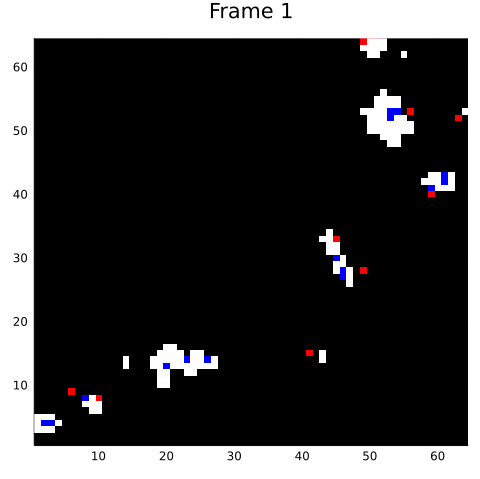

In [107]:
T_START = 60
TIME = 16
TIME_OUT = 8
X, y = ds[i].data[:, :, T_START:T_START+TIME-1], ds[i].data[:, :, T_START+TIME:T_START+TIME+TIME_OUT]
X = permutedims(reshape(X, (1, 64, 64, TIME, 1)), (5,4,3,2,1))
X = log.(X .+ 1)

#y = permutedims(model.predict(X / X_MAX), (5,4,3,2,1)) * X_MAX
predicted_y = permutedims(model.predict(X / X_MAX), (5,4,3,2,1))
predicted_y = predicted_y[1, :, :, :, 1]
#animation_comparation((predicted_y), y, 2)
zerotonan(x) = x == 0 ? NaN : x
animation_comparation(predicted_y .> 0.1, y, 2)

In [ ]:
# Balancear el conjunto de datos respecto al maximo de densidad de rayos
# Grafica de residuales o scatterplot (diferencia del target vs. predicho en eje y, eje x valor target)

In [ ]:
# [0, 1>
# [1, x>...

In [ ]:
start = 50
X_ds, y = ds[i].data[:, :, start:start+n-1], ds[i].data[:, :, start+n:start+2n-1]
X = permutedims(reshape(X_ds, (1, 64, 64, 8, 1)), (5,4,3,2,1))
X_max = maximum(X)
ŷ = permutedims(model.predict(X / X_max), (5,4,3,2,1))
losses = [Flux.Losses.binarycrossentropy(ŷ[1,:,:,i,1], X_ds[:, :, i] / X_max) for i in 1:n]
plot(losses)

In [ ]:
?Flux.Losses.binarycrossentropy